For executair these examples, você precisairá of the seguintes libraries: `numpy`: For operations numéricas eficientes. `scikit-image`: For functions of processing of images. `matplotlib`: For visualizair the images. `pydiwith`: (Opcional) For cairregair images in the formato DICOM, withum in medicina. `requests`: (Opcional) For baixair a image of example. Você can instalá-las using pip:

In [ ]:
!pip install numpy scikit-image matplotlib pydicom requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.3 MB/s eta 0:00:00


Volume 'brain' carregado. Usando a fatia 5.


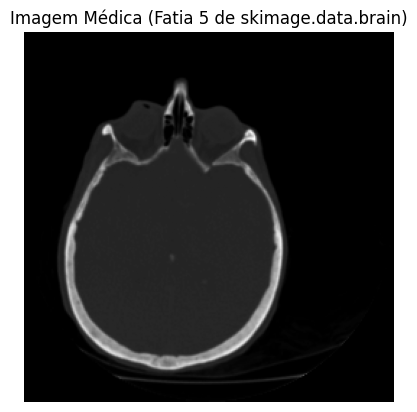

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, io, color, exposure


# Carregar o volume 'brain' do scikit-imagebrain_volume = data.brain() # Retorna um array 3D (slices, rows, cols)
# Verificar if the image was carregada corretamente and has 3 dimensionsif brain_volume is None or brain_volume.ndim != 3:
    raise ValueError("Não foi possível carregar o volume 'brain' ou ele não tem 3 dimensões.")

# Selecionar a single fatia (slice) - for example, the fatia of the meioslice_index = brain_volume.shape[0] // 2 # Pega the índice of the fatia centralimage_gray = brain_volume[slice_index, :, :]

# Verificar if the fatia selecionada is 2Dif image_gray.ndim != 2:
      raise ValueError("A fatia selecionada não é uma imagem 2D.")

# Converter para float no intervalo [0, 1]image_float = img_as_float(image_gray)
# Converter para ubyte no intervalo [0, 255]image_ubyte = img_as_ubyte(image_gray)

print(f"Volume 'brain' carregado. Usando a fatia {slice_index}.")
plt.figure("Imagem Original")
plt.imshow(image_ubyte, cmap='gray')
plt.title(f"Imagem Médica (Fatia {slice_index} de skimage.data.brain)")
plt.axis('off')
plt.show()



Examples chapter 2.4: Sampling, Quantization, Interpolation

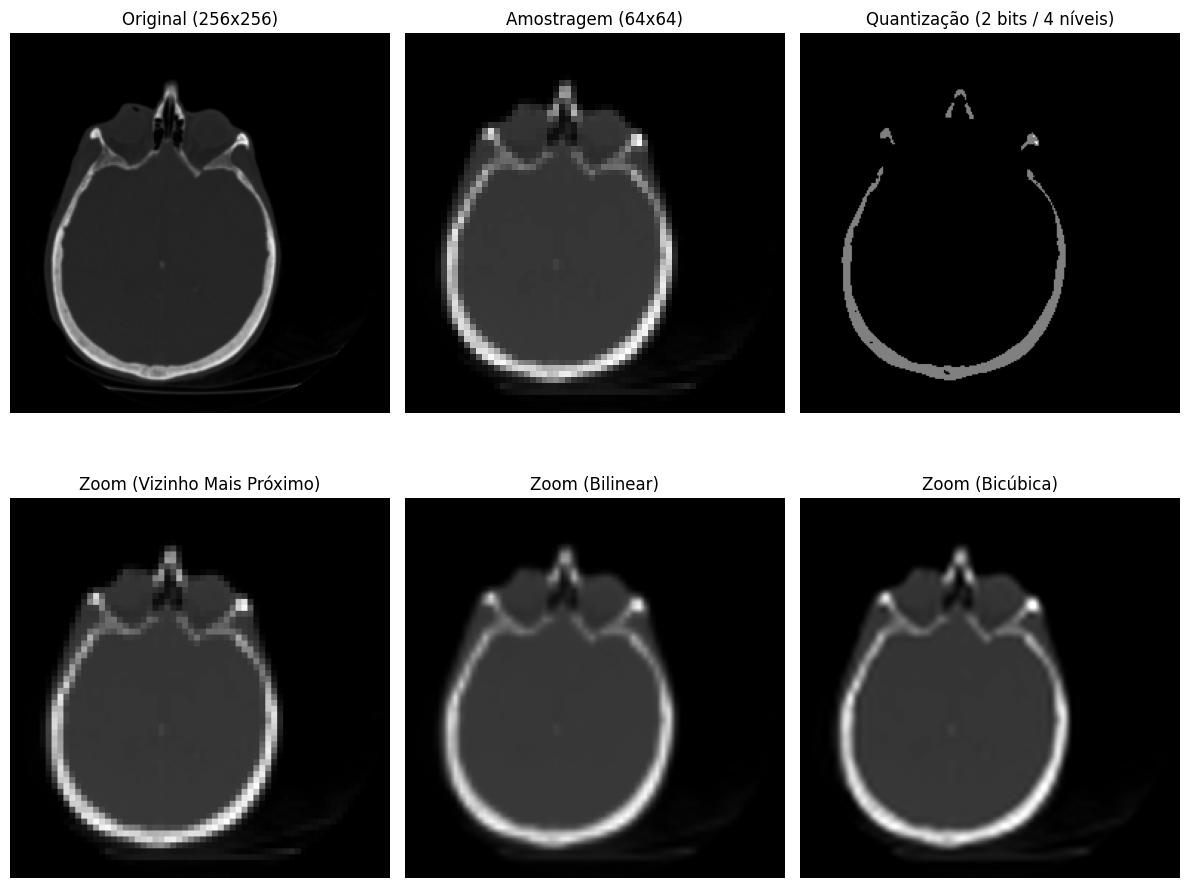

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, io, img_as_float, img_as_ubyte
from skimage.util import random_noise

# Usar a imagem carregada anteriormente (image_float ou image_ubyte)
# 1. Sampling (Redução of the Resolution Espacial)# Reduzir a imagem para 64x64 pixelsrows, cols = image_float.shape
image_sampled = transform.resize(image_float, (64, 64), anti_aliasing=True)

# 2. Quantization (Redução of the Resolution of Intensidade)# Reduzir for 2 bits (4 levels of cinza)bits = 2
levels = 2**bits
image_quantized = np.floor(image_float * (levels - 1)) / (levels - 1)
# Or using digitize for mapear for levels discrete# bins = np.linspace(0, 1, levels + 1)# image_quantized_indices = np.digitize(image_float, bins) - 1# image_quantized = bins[image_quantized_indices]
# 3. Interpolation (Zoom)# Ampliar the image sampled of volta ao tamanho original using different métodossize_original = image_float.shape

zoom_nn = transform.resize(image_sampled, size_original, order=0, anti_aliasing=False) # Nearest Neighbor (ordem 0)zoom_bilinear = transform.resize(image_sampled, size_original, order=1, anti_aliasing=True) # Bilinear (ordem 1)zoom_bicubic = transform.resize(image_sampled, size_original, order=3, anti_aliasing=True) # Bicubic (ordem 3)
# --- Visualization ---plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_float, cmap='gray')
plt.title(f"Original ({rows}x{cols})")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_sampled, cmap='gray')
plt.title("Amostragem (64x64)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_quantized, cmap='gray')
plt.title(f"Quantização ({bits} bits / {levels} níveis)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(zoom_nn, cmap='gray')
plt.title("Zoom (Vizinho Mais Próximo)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(zoom_bilinear, cmap='gray')
plt.title("Zoom (Bilinear)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(zoom_bicubic, cmap='gray')
plt.title("Zoom (Bicúbica)")
plt.axis('off')

plt.tight_layout()
plt.show()

Sampling: Reduzir the resolution espacial can levair à perda of detalhes finos, crucial in diagnostics médicos. Skimage. Transform. Resize is usada here. Quantization: Reduzir the levels of cinza can to create "falsos contornos", especialmente visível in regions of gradient suave, what can obscurecer patologias sutis. Interpolation: Ao ampliair (zoom) or transformair images, the escolha of the method of interpolation afeta the qualidade. Bicúbica geralmente oferece better qualidade visual that Bilineair and Vizinho More Next, but is withputacionalmente more custosa.

Examples chapter 2.6: Ferramentas Matemáticas

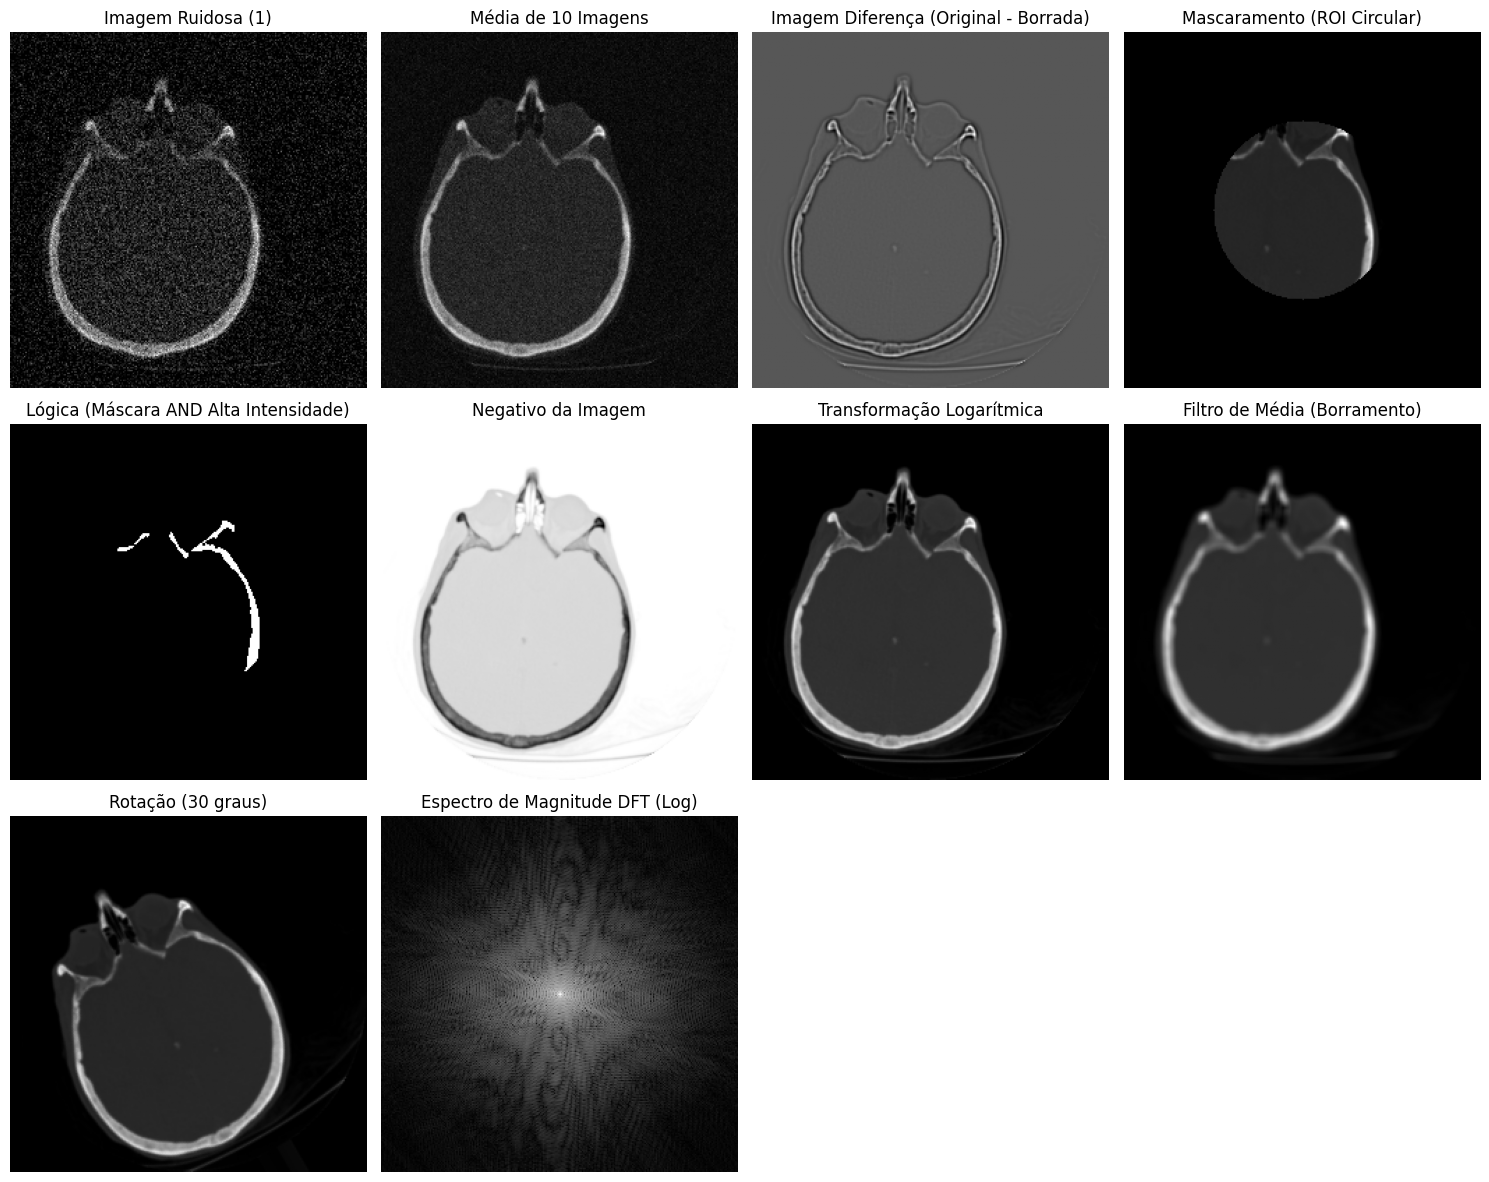

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, img_as_ubyte, exposure, transform
from skimage.util import random_noise
from scipy.ndimage import uniform_filter
import cv2 # OpenCV can to be useful here, especialmente for transformações
# Usar a imagem carregada (image_float, image_ubyte)
# 1. operations Aritméticas# The) Adição (Simular Média for Redução of Noise)noise_stddev = 0.1
noisy_images = [random_noise(image_float, mode='gaussian', var=noise_stddev**2) for _ in range(10)]
avg_image = np.mean(noisy_images, axis=0)
# Escalonar for visualization if necessaryavg_image_scaled = exposure.rescale_intensity(avg_image, out_range=(0, 1))

# B) Subtração (Realce of differences)# To create a versão levemente borrada and subtrairblurred_image = uniform_filter(image_float, size=5)
diff_image = image_float - blurred_image
# Escalonar result for visualization (differences can to be small or negativas)diff_image_scaled = exposure.rescale_intensity(diff_image, out_range=(0, 1))

# C) Multiplicação (Mascaramento / ROI)# To create a mask circular in the centrorows, cols = image_float.shape
center_row, center_col = rows // 2, cols // 2
radius = min(rows, cols) // 4
y, x = np.ogrid[:rows, :cols]
mask = (x - center_col)**2 + (y - center_row)**2 <= radius**2
masked_image = image_float * mask # Multiplicação elementwise
# 2. operations Lógicas (with the mask binary)# Ex: Encontrar pixels in the image original that are Inside of the mask And have alta intensidadehigh_intensity_mask = image_float > 0.2
logical_and_image = mask & high_intensity_mask

# 3. operations Espaciais (Point Single)# a) Negativonegative_image = 1.0 - image_float # Ou 255 - image_ubyte
# B) Transformação Logarítmica (enhances detalhes escuros)c = 1 # Constantelog_image = c * np.log(1 + image_float)
log_image_scaled = exposure.rescale_intensity(log_image, out_range=(0,1))


# 4. operations Espaciais (Vizinhança)# Média local (already feita above as blurred_image)

# 5. Transformação Geométrica (Rotação)rotated_image = transform.rotate(image_float, angle=30, resize=False, mode='edge') # Rotaciona 30 graus

# 6. Transformadas (Introdução - DFT)# Calcular a 2D FFTfft_image = np.fft.fft2(image_float)
# Centralizar the component of baixa frequency (DC)fft_shifted = np.fft.fftshift(fft_image)
# To calculate the magnitude (escala logarítmica for visualization)magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)


# --- Visualization ---plt.figure(figsize=(15, 12))

plt.subplot(3, 4, 1)
plt.imshow(noisy_images[0], cmap='gray')
plt.title("Imagem Ruidosa (1)")
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(avg_image_scaled, cmap='gray')
plt.title("Média de 10 Imagens")
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(diff_image_scaled, cmap='gray')
plt.title("Imagem Diferença (Original - Borrada)")
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(masked_image, cmap='gray')
plt.title("Mascaramento (ROI Circular)")
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(logical_and_image, cmap='gray')
plt.title("Lógica (Máscara AND Alta Intensidade)")
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(negative_image, cmap='gray')
plt.title("Negativo da Imagem")
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(log_image_scaled, cmap='gray')
plt.title("Transformação Logarítmica")
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(blurred_image, cmap='gray')
plt.title("Filtro de Média (Borramento)")
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotação (30 graus)")
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Espectro de Magnitude DFT (Log)")
plt.axis('off')

plt.tight_layout()
plt.show()

Aritméticas: Adição is usada for reduzir noise in sequências of images (ex: fluoroscopia, PET); subtração is chave in DSA and detection of changes; multiplicação/divisão for to apply máscairas (ROI) or corrigir illumination/campo not uniformes. Lógicas: Essenciais for withbinair máscairas and results of segmentation. Espaciais (Point): Transformações as negativo or log can realçair information specific in images medical. Espaciais (Vizinhança): Base for filters of smoothing (redução of noise) and enhancement of edges (detection of contornos). Geométricas: Fundamentais for corrigir distorções, alinhair (registrair) images of different modalidades or tempos, and padronizair orientação. Transformadas: The DFT (and others as Wavelets) allows analisair and manipulair images in the domain of the frequency, useful for filtragem of noise periodic, withpressão and analysis of textura.

**Tarefas - chapter 2.4: Sampling, Quantization and Interpolation** 1. Quantization Manual: Crie a function `quantizair(imagem, niveis)` that receba a image and a number of `niveis` desejado. The function should retornair the image quantizada, mapeando the intensidades originais for the `niveis` discrete of form equidistante. Not use `np.Digitize`, implemente the lógica of mapeamento diretamente (ex: `np.Floor(imagem * (niveis - 1)) / (niveis - 1))`. Test the function for 16, 8, 4 and 2 levels and visualize the efeito of the falso contour. 2. Analysis of Interpolation: Reduza the resolution espacial of the image original (ex: for 1/4 of the tamanho original in each dimension). Amplie the image reduzida of volta to the tamanho original using the three métodos of interpolation (Vizinho More Next, Bilineair, Bicúbica). Calcule and exiba the difference absoluta between each image ampliada and the image original. Which method of interpolation minimiza the difference? Discuta visualmente the differences, especialmente in the edges.

**Tarefas - chapter 2.6: Ferramentas Matemáticas** 1. Implementation of Escalonamento: Crie a function `escalonair_intensidade(imagem, min_out, max_out)` that receba a image (numpy array) and the values minimum and maximum desejados for the output. The function should escalonair lineairmente the values of intensidade of the image for that if encaixem in the intervalo [`min_out`, `max_out`]. Utilize the fórmula baseada in the Eqs. 2.31 and 2.32 of the livro. Test the function after a operation airitmética (as adição or subtração) for gairantir that the result esteja in the faixa visualizável (ex: [0, 255] or [0, 1]). 2. mask of ROI Retangulair: Crie a function that gere a mask binary retangulair dadas the coordenadas of the canto superior esquerdo and inferior direito. Aplique that mask the a image médica for isolair a region of interesse retangulair. 3. comparison of Filters of Média: Implemente a filter of average 3x3 using loops `for` aninhados for iterair about the pixels and their vizinhanças (ignore the edges for simplificair). Use the function `scipy. Ndimage. Uniform_filter` with size=3 in the same image. Compare visualmente the results (should to be quase idênticos, exceto in the edges). (Opcional) Use the librairy `time` for medir the tempo of execution of ambas the implementações. What is more rápida and by quê? 4. Analysis of Histograma: Cairregue duas images medical different (or duas fatias different of the `data. Brain()`). Calcule and plote the histogramas of ambas the images in the even graph. Calcule the intensidade average and the desvio pattern (as proxy for contraste) for each image using `numpy. Mean()` and `numpy. Std()`. Compare the values and relacione-the with the apairência visual of the images and their histogramas.